1. Sommario dei dati utilizzati

a. Breve descrizione di ciascun titolo selezionato e motivazione della scelta

Settori: automobili, tecnologia e medicina

notizie che ritengo rilevanti al fine di generare una crescita di interesse verso l'azienda "nome_azienda":

nome_azienda = "TESLA"
1. Partorisce in una Tesla mentre l'autopilot la porta in ospedale
link notizia: https://www.corriere.it/motori/news/nuova-mobilita/21_dicembre_21/partorisce-traffico-una-tesla-l-autopilot-impostato-l-ospedale-97648fd6-6239-11ec-a583-0974d17fd3de.shtml

2. Nuovamente premiata la sicurezza Tesla: pieni voti ai crash test della model Y 2022
link notizia: https://www.automoto.it/elettrico/nuovamente-premiata-la-sicurezza-tesla-pieni-voti-ai-crash-test-della-model-y-2022-video.html


nome_azienda = "NIO":
1. NIO, la nuova ET5 minaccia Tesla Model 3? secondo i media locali, il nuovo veicolo ha fatto registrare un livello record di pre-ordini
https://it.investing.com/news/stock-market-news/nio-la-nuova-et5-minaccia-tesla-model-3-2032890


nome_azienda = "META PLATFORMS"
1. L'annuncio della posizione/mission che Facebook vuole adottare nel futuro verso il metaverso ha suscitato un enorme interesse verso di essa. Soprattutto la nascita di esperienze legate al metaverso e al mondo NFT come The Sandbox e la partecipazione in quest'ultimo da parte di grandi aziende fa capire la direzione che assuemerà la tecnologia e l'economia del futuro. Più che futuro è un cambiamento che sta avvenendo già adesso.
link presentazione meta: https://www.youtube.com/watch?v=Uvufun6xer8&t=4086s
link the sandbox: https://www.everyeye.it/articoli/provato-the-sandbox-prova-primi-passi-metaverso-55547.html


nome_azienda = "APPLE"
1. Apple è sul punto di superare una capitalizzazione di mercato di 3000 miliardi di dollari, diventando potenzialmente la prima azienda al mondo a riuscirci
link notizia: https://it.investing.com/news/stock-market-news/target-price-su-apple-nuovo-massimo-da-wall-street-2031992


nome_azienda = "NOVAVAX"
1.  le azioni Novavax Inc (NASDAQ:NVAX) hanno avuto un rialzo dopo che la società ha annunciato che l'Agenzia europea per i medicinali ha raccomandato la concessione dell'autorizzazione all'immissione in commercio condizionata per il suo vaccino anti-Covid, NVX-CoV2373, al fine di prevenire il COVID-19 nelle persone di età pari o superiore a 18 anni.
link notizia: https://it.investing.com/news/stock-market-news/novavax-perche-il-titolo-e-in-aumento-oggi-2032994


nome_azienda = "VIATRIS"
1. Viatris Inc. una nuova azienda con la mission della global healthcare è stata aggiunta alla lista degli America's most Responsible Companies 2022. Premio riconosciuto da Newsweek e Statista Inc., il miglior portale al mondo di statistica e ranking aziendali. La lista a cui è stata aggiunta, riconosce le top 500 responsible companies negli Stati Uniti. Si sono classificati 167 esimi e nella Top 20 nella categoria Health Care & Life Sciences.
link notizia: https://www.prnewswire.com/news-releases/viatris-named-by-newsweek-as-one-of-americas-most-responsible-companies-301437781.html



_______________________________________________________________________________________________________________________

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install yfinance

b. Funzioni utilizzate per scaricare i dati da Yahoo! Finance o da altri siti

In [2]:
import pandas as pd
import yfinance as yf

meta_df = yf.download('FB', start='2011-11-30', end='2021-11-30')
apple_df = yf.download('AAPL', start='2011-11-30', end='2021-11-30')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


c. Funzioni utilizzate per la fusione delle serie in un unico DataFrame

d. Presentazione dei dati con un grafico e le prime righe del DataFrame

In [3]:
meta_apple = meta_df.join(apple_df, lsuffix="_Meta", rsuffix="_Apple")
meta_apple.head()

,Open_Meta,High_Meta,Low_Meta,Close_Meta,Adj Close_Meta,Volume_Meta,Open_Apple,High_Apple,Low_Apple,Close_Apple,Adj Close_Apple,Volume_Apple
Date,,,,,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,19.070000,19.407499,18.649286,18.942142,16.240328,732292400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,19.089287,20.055000,19.073214,20.045713,17.186495,631106000
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,20.341070,20.495714,19.735001,19.891787,17.054522,694870400
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,19.910713,20.457144,19.758215,20.377144,17.470648,584897600
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,20.566786,20.589287,20.043928,20.190001,17.310200,496230000


_______________________________________________________________________________________________________________________

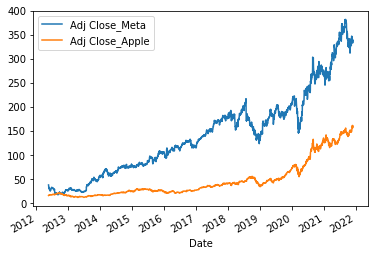

In [4]:
import matplotlib.pyplot as plt
meta_apple = meta_apple[["Adj Close_Meta", "Adj Close_Apple"]]
meta_apple.plot(grid = True)
plt.grid()
plt.show()

_______________________________________________________________________________________________________________________

Chiusura: Chiaramente le stesse librerie vengono utilizzate per tutte le aziende prese in considerazioni. Ciò che ho riportato sopra è un esempio di applicazione di utilizzo.

_______________________________________________________________________________________________________

2. Statistiche Descrittive

_______________________________________________________________________________________________________________________________

In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
#Tecnologia
meta_df = yf.download('FB', start='2011-11-30', end='2021-11-30')
meta_df = meta_df.groupby(pd.Grouper(freq='M')).mean()
meta_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-31,33.015556,33.868889,31.057778,31.870000,31.870000,1.390570e+08
2012-06-30,29.537143,30.232381,28.893333,29.540476,29.540476,3.180526e+07
2012-07-31,29.143333,29.598095,28.437619,28.880000,28.880000,2.477094e+07
2012-08-31,20.287391,20.644783,19.768696,20.108261,20.108261,5.008456e+07
2012-09-30,20.629474,21.089474,20.170526,20.627895,20.627895,5.571809e+07


_______________________________________________________________________________________________________________________________

a. Calcolare i rendimenti semplici e composti e visualizzarli in un grafico

_______________________________________________________________________________________________________________________________

Rendimenti Semplici

_______________________________________________________________________________________________________________________________

In [6]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
#Tecnologia
meta_month_returns = meta_df[['Adj Close']]
apple_month_returns = apple_df[['Adj Close']]
rendimenti_df = pd.DataFrame()

rendimenti_netti_meta = np.log(meta_month_returns/meta_month_returns.shift(1))
rendimenti_lordi_meta = np.log(rendimenti_netti_meta + 1)

rendimenti_netti_apple = np.log(apple_month_returns/apple_month_returns.shift(1))
rendimenti_lordi_apple = np.log(rendimenti_netti_apple + 1)

rendimenti_df["Rendimenti Netti Meta"] = rendimenti_netti_meta
rendimenti_df["Rendimenti Lordi Meta"] = rendimenti_lordi_meta
rendimenti_df["Rendimenti Netti Apple"] = rendimenti_netti_apple
rendimenti_df["Rendimenti Lordi Apple"] = rendimenti_lordi_apple
rendimenti_df = rendimenti_df.dropna()

rendimenti_df

,Rendimenti Netti Meta,Rendimenti Lordi Meta,Rendimenti Netti Apple,Rendimenti Lordi Apple
Date,,,,
2012-07-31,-0.022612,-0.022872,0.026092,0.025758
2012-08-31,-0.362019,-0.449446,0.002062,0.002060
2012-10-31,-0.000406,-0.000406,-0.014475,-0.014581
2012-11-30,0.104295,0.099207,-0.006948,-0.006972
2012-12-31,0.170162,0.157142,0.043356,0.042443
...,...,...,...,...
2021-03-31,0.033847,0.033287,0.018592,0.018421
2021-04-30,0.110687,0.104979,-0.015249,-0.015366
2021-06-30,0.058417,0.056774,0.004611,0.004600


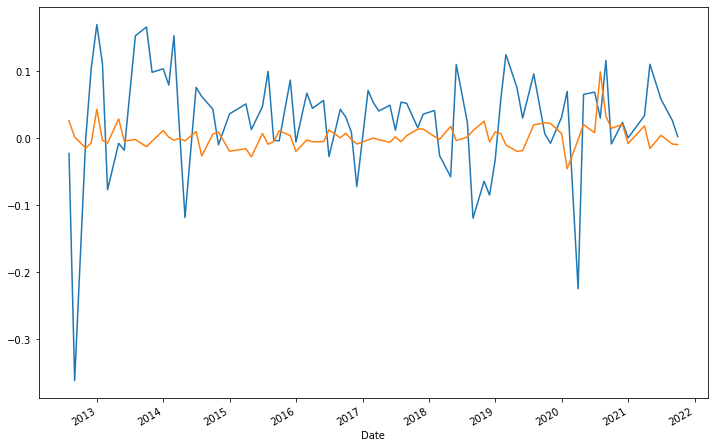

In [7]:
rendimenti_df["Rendimenti Netti Meta"].plot(figsize=(12,8))
rendimenti_df["Rendimenti Netti Apple"].plot(figsize=(12,8))
plt.show()

_______________________________________________________________________________________________________

Rendimenti Composti

_______________________________________________________________________________________________________________________________

In [8]:
cum_daily_return_meta = (1 + rendimenti_netti_meta).cumprod()
rendimenti_df["Rendimento Composto Meta"] = cum_daily_return_meta

cum_daily_return_apple = (1 + rendimenti_netti_apple).cumprod()
rendimenti_df["Rendimento Composto Apple"] = cum_daily_return_apple
rendimenti_df[["Rendimento Composto Meta", "Rendimento Composto Apple"]]


,Rendimento Composto Meta,Rendimento Composto Apple
Date,,
2012-07-31,0.903201,1.595839
2012-08-31,0.576225,1.743175
2012-10-31,0.590687,1.551122
2012-11-30,0.652293,1.523175
2012-12-31,0.763288,1.376825
...,...,...
2021-03-31,5.890316,7.214575
2021-04-30,6.542299,7.749389
2021-06-30,7.136790,8.058096


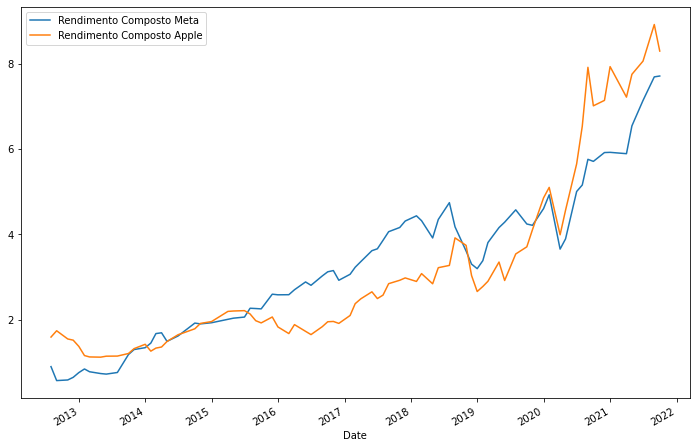

In [9]:
rendimenti_df[["Rendimento Composto Meta", "Rendimento Composto Apple"]].plot(figsize=(12,8))
plt.show()

____________________________________________________________________________________________________________________________

b. Commentare

_______________________________________________________________________________________________________________________________

In [10]:
#Tecnologia
meta_df = yf.download('FB', start='2011-11-30', end='2021-11-30')
apple_df = yf.download('AAPL', start='2011-11-30', end='2021-11-30')
apple_meta_df = meta_df.join(apple_df, lsuffix='_Meta', rsuffix='_Apple')
apple_meta_df = apple_meta_df.groupby(pd.Grouper(freq='Y')).mean()
apple_meta_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open_Meta,High_Meta,Low_Meta,Close_Meta,Adj Close_Meta,Volume_Meta,Open_Apple,High_Apple,Low_Apple,Close_Apple,Adj Close_Apple,Volume_Apple
Date,,,,,,,,,,,,
2012-12-31,24.799613,25.300903,24.195871,24.673097,24.673097,5.464815e+07,21.524984,21.715758,21.271256,21.501701,18.503841,4.923590e+08
2013-12-31,35.476429,36.045040,34.930159,35.481151,35.481151,6.009199e+07,16.897433,17.058533,16.723111,16.879817,14.799176,4.064348e+08
2014-12-31,68.763968,69.639524,67.830199,68.762341,68.762341,4.753055e+07,23.054958,23.253166,22.868885,23.066164,20.711916,2.526109e+08
2015-12-31,88.749405,89.683373,87.762778,88.772857,88.772857,2.695888e+07,30.043938,30.311131,29.715774,30.010000,27.407819,2.073976e+08
2016-12-31,117.081071,118.091706,115.865873,117.035873,117.035873,2.547507e+07,26.126944,26.356796,25.922569,26.151002,24.378621,1.536901e+08


____________________________________________________________________________________________________________________________

Che cosa hanno in comune le serie storiche, ci sono momenti di rendimenti molto lontani dalla media?

____________________________________________________________________________________________________________________________

In [11]:
apple_meta_df = apple_meta_df[['Adj Close_Meta', 'Adj Close_Apple']]
apple_meta_df.head()

,Adj Close_Meta,Adj Close_Apple
Date,,
2012-12-31,24.673097,18.503841
2013-12-31,35.481151,14.799176
2014-12-31,68.762341,20.711916
2015-12-31,88.772857,27.407819
2016-12-31,117.035873,24.378621


In [12]:
apple_meta_returns = apple_meta_df.pct_change()
apple_meta_returns = apple_meta_returns.dropna()
apple_meta_returns.head(20)

,Adj Close_Meta,Adj Close_Apple
Date,,
2013-12-31,0.438050,-0.200211
2014-12-31,0.937996,0.399532
2015-12-31,0.291010,0.323287
2016-12-31,0.318375,-0.110523
2017-12-31,0.337848,0.466393
2018-12-31,0.095383,0.274878
2019-12-31,0.059043,0.118957
2020-12-31,0.291313,0.852308
2021-12-31,0.365256,0.453924


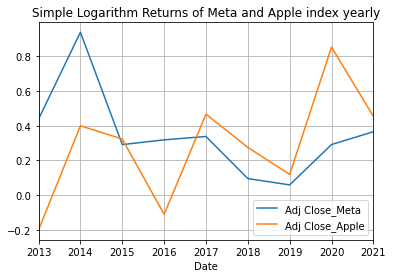

In [13]:
apple_meta_returns.plot(grid=True, title = 'Simple Logarithm Returns of Meta and Apple index yearly');

Apple:

Nel periodo 2015-2016 c'è stato un decremento di domanda da parte dell'Asia verso i prodotti Apple, questo spiega la consguente perdita con un ritorno semplice atteso che passò da positivo del 32% ad un negativo -11%.

(articolo di Fortune scritto nel 2016)
Gli analisti avevano ampiamente previsto un simile risultato, in parte perché le vendite di iPhone nei primi tre mesi del 2015 sono state artificialmente aumentate da gravi carenze di approvvigionamento che hanno ritardato le vendite dall'ultimo trimestre del 2014. 
Un altro fattore è stato il rafforzamento del dollaro USA dal 2015, che ha effettivamente ridotto il valore delle vendite di Apple all'estero di oltre 2 miliardi di dollari, ovvero circa 4%.
link articolo: https://fortune.com/2016/05/06/apple-shares-two-year-low/
link articolo: https://fortune.com/2016/04/26/apple-future-update-iphone/



Nel periodo 2019-2020 da 11% a 85%
La crescita esplosiva di AirPods, lo slancio promettente per l'Apple Watch e la promessa di un più grande salto tecnologico e delle funzionalità per la linea di iPhone nel 2020 hanno alimentato un grande anno per le azioni Apple.
Toni Sacconaghi, analista di Bernstein Research, stima che le vendite di AirPod siano state di circa 6 miliardi di dollari nel 2019 e siano quasi raddoppiate rispetto al 2018. L'analista di Bernstein prevede che le entrate di AirPod raggiungeranno i 15 miliardi di dollari nel 2020.
link articolo: https://www.fool.com/investing/2020/01/12/why-apple-stock-soared-862-in-2019.aspx



Facebook/Meta:

Nel periodo 2017-2019 il ritorno semplice atteso delle azioni di Facebook passarono da un 34% ad un 0.9% a fine 2019.
Dovuto ai seguenti eventi:

-Dichiarazione di Mark Zuckemberg:
Gli utenti spendono meno tempo sulla sua piattaforma.

-Cambridge Analitica: 
il più grande scandalo nella storia di facebook.
Un ricercatore esterno ha raccolto e poi venduto i dati personali di decine di milioni di utenti alla società di analisi che ha aiutato a eleggere il presidente di Donald Trump. 
La rivelazione ha dato il via a una serie di eventi, tra cui un'indagine formale della Federal Trade Commission sulle pratiche sulla privacy di Facebook che ha portato a una multa di 5 miliardi di dollari un anno dopo.

-Earning disaster:
La società ha mancato in modo insolito le stime sugli utili per le entrate e la crescita degli utenti, alimentando le preoccupazioni che i suoi scandali avessero finalmente colpito l'azienda. Facebook ha perso 121 miliardi di dollari di valore di mercato in seguito al rapporto.


immagine:
https://assets.bwbx.io/images/users/iqjWHBFdfxIU/iQ2BOKamCy58/v2/pidjEfPlU1QWZop3vfGKsrX.ke8XuWirGYh1PKgEw44kE/-1x-1.png


____________________________________________________________________________________________________________________________

correlazione tra Apple e Meta?

____________________________________________________________________________________________________________________________

In [37]:
import seaborn as sns

data_df = yf.download('FB AAPL', start='2011-11-30', end='2021-11-30')
data_df = data_df['Adj Close']
returns = data_df.pct_change()
returns = returns.dropna()
correlation = returns.corr()
correlation

[*********************100%***********************]  2 of 2 completed


,AAPL,FB
AAPL,1.000000,0.402076
FB,0.402076,1.000000


<AxesSubplot:>

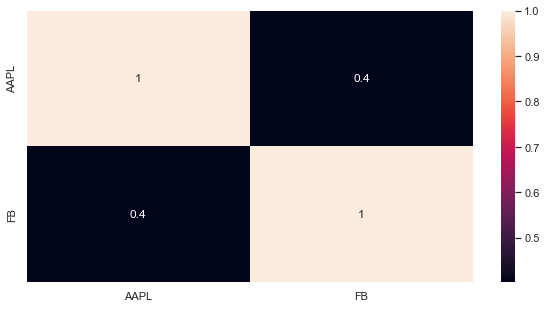

In [15]:
sns.set(rc ={'figure.figsize' : (10, 5)})
sns.heatmap(correlation, annot=True)

Possiamo vedere come, seppure esiste una correlazione positiva tra apple e meta, quest'ultima sia molto debole.

_______________________________________________________________________________________________________________________________

In [16]:
#Automobili
import csv
import pandas as pd
import yfinance as yf

nio_df = pd.read_csv('NIO.csv', header=0, index_col='Date', parse_dates=True)
tesla_df = yf.download('TSLA', start='2018-09-13', end='2021-11-30')
nio_tesla_df = nio_df.join(tesla_df, lsuffix='_Nio', rsuffix='_Tesla')
nio_tesla_df = nio_tesla_df.groupby(pd.Grouper(freq='M')).mean()
nio_tesla_df.head()

[*********************100%***********************]  1 of 1 completed


,Open_Nio,High_Nio,Low_Nio,Close_Nio,Adj Close_Nio,Volume_Nio,Open_Tesla,High_Tesla,Low_Tesla,Close_Tesla,Adj Close_Tesla,Volume_Tesla
Date,,,,,,,,,,,,
2018-09-30,8.509167,9.350000,7.742500,8.374167,8.374167,5.146636e+07,58.813834,60.280833,57.719833,59.057500,59.057500,4.856771e+07
2018-10-31,6.922609,7.123913,6.590435,6.802609,6.802609,1.830423e+07,57.285827,58.628261,55.352783,56.998609,56.998609,6.225233e+07
2018-11-30,7.134286,7.450476,6.910952,7.171429,7.171429,1.993946e+07,68.556858,69.963238,67.524667,68.899047,68.899047,3.167121e+07
2018-12-31,6.982632,7.147368,6.684211,6.904737,6.904737,1.252072e+07,69.203790,70.568736,67.242947,68.821895,68.821895,3.853979e+07
2019-01-31,6.602381,6.809048,6.493810,6.692381,6.692381,1.073931e+07,63.338190,64.702762,62.091905,63.698857,63.698857,4.182193e+07


In [17]:
nio_tesla_df = nio_tesla_df[['Adj Close_Nio', 'Adj Close_Tesla']]
nio_tesla_df.head()

,Adj Close_Nio,Adj Close_Tesla
Date,,
2018-09-30,8.374167,59.057500
2018-10-31,6.802609,56.998609
2018-11-30,7.171429,68.899047
2018-12-31,6.904737,68.821895
2019-01-31,6.692381,63.698857


_______________________________________________________________________________________________________

2. Statistiche Descrittive

_______________________________________________________________________________________________________

a. Calcolare i rendimenti semplici e composti e visualizzarli in un grafico

In [18]:
import numpy as np
import matplotlib.pyplot as plt

#Tecnologia
rendimenti_df = pd.DataFrame()
tesla_df = tesla_df[['Adj Close']]
nio_df = nio_df[['Adj Close']]

rendimenti_netti_tesla = np.log(tesla_df/tesla_df.shift(1))
rendimenti_lordi_tesla = np.log(rendimenti_netti_tesla + 1)

rendimenti_netti_nio = np.log(nio_df/nio_df.shift(1))
rendimenti_lordi_nio = np.log(rendimenti_netti_nio + 1)

rendimenti_df["Rendimenti Netti Tesla"] = rendimenti_netti_tesla
rendimenti_df["Rendimenti Lordi Tesla"] = rendimenti_lordi_tesla
rendimenti_df["Rendimenti Netti Nio"] = rendimenti_netti_nio
rendimenti_df["Rendimenti Lordi Nio"] = rendimenti_lordi_nio
rendimenti_df = rendimenti_df.dropna()
rendimenti_df

,Rendimenti Netti Tesla,Rendimenti Lordi Tesla,Rendimenti Netti Nio,Rendimenti Lordi Nio
Date,,,,
2018-09-14,0.019636,0.019446,-0.158470,-0.172534
2018-09-17,-0.001220,-0.001221,-0.152469,-0.165427
2018-09-18,-0.034084,-0.034678,-0.101447,-0.106969
2018-09-19,0.048162,0.047038,0.101447,0.096624
2018-09-20,-0.002310,-0.002313,0.032410,0.031896
...,...,...,...,...
2021-11-22,0.017272,0.017125,0.070647,0.068263
2021-11-23,-0.042232,-0.043150,0.013169,0.013083
2021-11-24,0.006265,0.006246,-0.014858,-0.014969


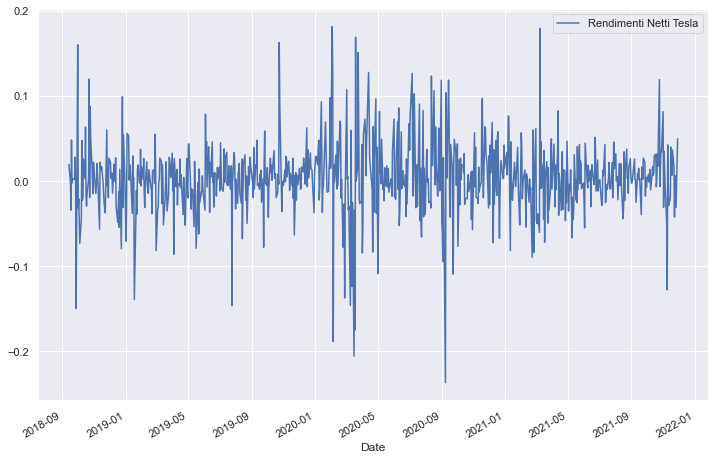

In [19]:
rendimenti_df[["Rendimenti Netti Tesla"]].plot(figsize=(12,8))
plt.show()

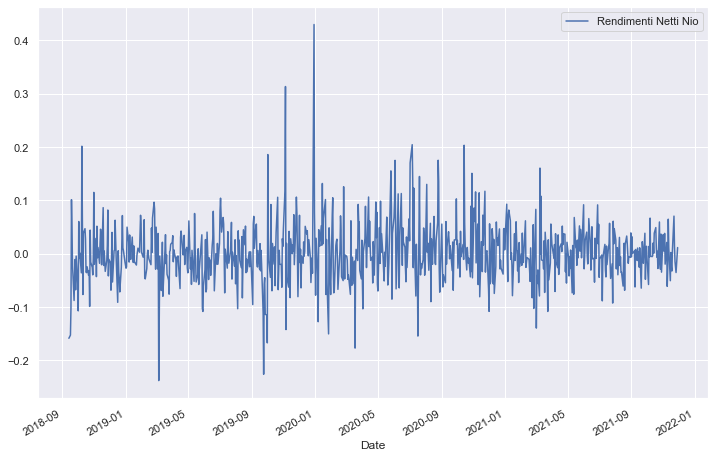

In [20]:
rendimenti_df[["Rendimenti Netti Nio"]].plot(figsize=(12,8))
plt.show()

_______________________________________________________________________________________________________

Rendimenti Composti

_______________________________________________________________________________________________________

In [23]:
cum_daily_return_tesla = (1 + rendimenti_netti_tesla).cumprod()
rendimenti_df["Rendimento Composto Tesla"] = cum_daily_return_tesla

cum_daily_return_nio = (1 + rendimenti_netti_nio).cumprod()
rendimenti_df["Rendimento Composto Nio"] = cum_daily_return_nio
rendimenti_df[["Rendimento Composto Tesla", "Rendimento Composto Nio"]]

,Rendimento Composto Tesla,Rendimento Composto Nio
Date,,
2018-09-14,1.015839,0.841530
2018-09-17,1.014599,0.713223
2018-09-18,0.980017,0.640869
2018-09-19,1.027217,0.705883
2018-09-20,1.024844,0.728761
...,...,...
2021-11-22,9.540716,0.995015
2021-11-23,9.137789,1.008119
2021-11-24,9.195038,0.993140


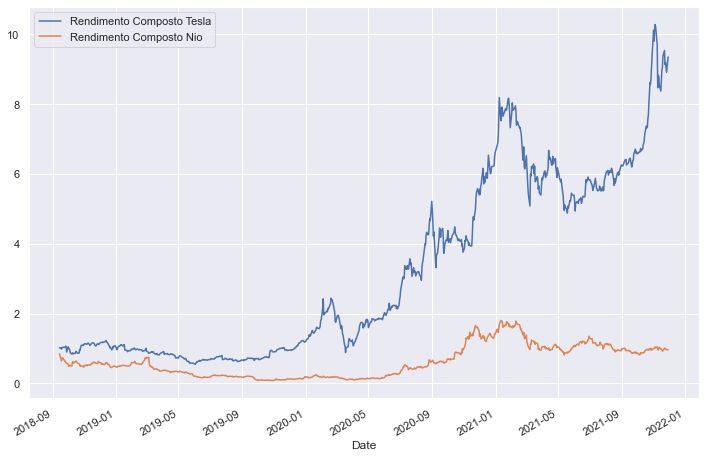

In [24]:
rendimenti_df[["Rendimento Composto Tesla", "Rendimento Composto Nio"]].plot(figsize=(12,8))
plt.show()

_______________________________________________________________________________________________________

Che cosa hanno in comune le serie storiche, ci sono momenti di rendimenti molto lontani dalla media?

_______________________________________________________________________________________________________

In [30]:
nio_df = pd.read_csv('NIO.csv', header=0, index_col='Date', parse_dates=True)
tesla_df = yf.download('TSLA', start='2018-09-13', end='2021-11-30')
nio_tesla_df = nio_df.join(tesla_df, lsuffix='_Nio', rsuffix='_Tesla')
nio_tesla_df = nio_tesla_df.groupby(pd.Grouper(freq='M')).mean()
nio_tesla_df.head()

[*********************100%***********************]  1 of 1 completed


,Open_Nio,High_Nio,Low_Nio,Close_Nio,Adj Close_Nio,Volume_Nio,Open_Tesla,High_Tesla,Low_Tesla,Close_Tesla,Adj Close_Tesla,Volume_Tesla
Date,,,,,,,,,,,,
2018-09-30,8.509167,9.350000,7.742500,8.374167,8.374167,5.146636e+07,58.813834,60.280833,57.719833,59.057500,59.057500,4.856771e+07
2018-10-31,6.922609,7.123913,6.590435,6.802609,6.802609,1.830423e+07,57.285827,58.628261,55.352783,56.998609,56.998609,6.225233e+07
2018-11-30,7.134286,7.450476,6.910952,7.171429,7.171429,1.993946e+07,68.556858,69.963238,67.524667,68.899047,68.899047,3.167121e+07
2018-12-31,6.982632,7.147368,6.684211,6.904737,6.904737,1.252072e+07,69.203790,70.568736,67.242947,68.821895,68.821895,3.853979e+07
2019-01-31,6.602381,6.809048,6.493810,6.692381,6.692381,1.073931e+07,63.338190,64.702762,62.091905,63.698857,63.698857,4.182193e+07


In [33]:
nio_tesla_df = nio_tesla_df[["Adj Close_Tesla", "Adj Close_Nio"]]
nio_tesla_df_returns = nio_tesla_df.pct_change()
nio_tesla_df_returns = nio_tesla_df_returns.dropna()
nio_tesla_df_returns.head()

,Adj Close_Tesla,Adj Close_Nio
Date,,
2018-10-31,-0.034862,-0.187667
2018-11-30,0.208785,0.054217
2018-12-31,-0.001120,-0.037188
2019-01-31,-0.074439,-0.030755
2019-02-28,-0.033802,0.210489


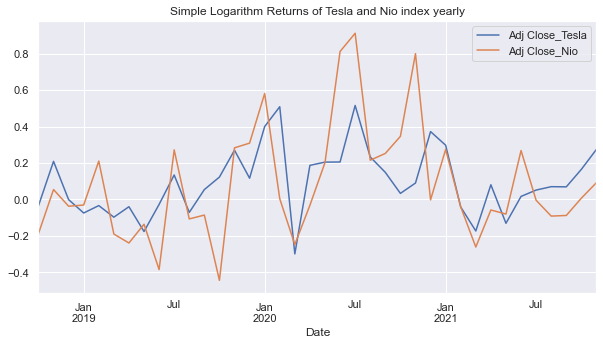

In [32]:
nio_tesla_df_returns.plot(grid=True, title = 'Simple Logarithm Returns of Tesla and Nio index yearly');

drop a Marzo 2020 sia per Nio che per Tesla per via della pandemia COVID.

Nio:

Le azioni di NIO sono aumentate dell'1.110% nel 2020, secondo i dati di S&P Global Market Intelligence. Le azioni della società cinese di veicoli elettrici (EV) sono aumentate grazie a segnali di slancio e potenziale crescita a lungo termine per il settore.

L'azienda ha consegnato 7.007 veicoli a dicembre 2020 (+121% anno su anno), portando il conteggio totale delle consegne dell'azienda per anno a 43.728 contro le consegne tesla di 499.550 unità nel 2020 e di 367.500 unità nel 2019.

Il numero di consegne di veicoli per il 2020 ha rappresentato un aumento annuo di circa il 112,6%.
I sussidi governativi per gli acquirenti di veicoli elettrici hanno contribuito ad accelerare la crescita del settore in Cina e hanno contribuito a dare slancio a NIO. 
I sussidi all'acquisto erano anche legati a metriche di prestazione che dovrebbero corrispondere a una riduzione dell'inquinamento e i veicoli NIO generalmente hanno ottenuto buoni risultati nelle categorie pertinenti. 
Tuttavia, il Ministero delle finanze cinese ha ridotto i sussidi del 20% per il 2021 in risposta ai segnali di miglioramento dell'adozione organica per i veicoli elettrici questo spiega il calo ad inizio 2021.

Tesla:
novembre 2021 drop dopo che il CEO Elon Musk ha postato la decisione su twitter di vendere il 10% delle sue azioni nel settore dei veicoli elettrici.

link articolo: https://www.marketwatch.com/story/tesla-stock-tumbles-toward-2nd-bear-market-in-6-months-2020-09-08
link articolo: https://www.cnbc.com/2021/11/12/tesla-stock-had-its-worst-week-in-20-months-after-musk-sold-shares.html
    

_______________________________________________________________________________________________________

correlazione tra Nio e Tesla?

_______________________________________________________________________________________________________

In [39]:
import seaborn as sns

correlation_nio_tesla = nio_tesla_df_returns.corr()
correlation_nio_tesla

,Adj Close_Tesla,Adj Close_Nio
Adj Close_Tesla,1.000000,0.553824
Adj Close_Nio,0.553824,1.000000


<AxesSubplot:>

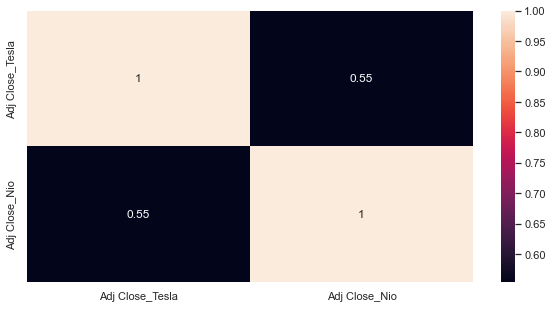

In [40]:
sns.set(rc ={'figure.figsize' : (10, 5)})
sns.heatmap(correlation_nio_tesla, annot=True)

Possiamo vedere anche qui come, seppure esiste una correlazione positiva tra tesla e nio, quest'ultima sia molto debole. Nio è una realtà nata nel 2018 e si sta affermando molto velocemente soprattutto nel mercato asiatico, in futuro potrebbe ostacolare tesla soprattutto grazie all'innovazione di NIO.
Invece di avere una batteria da ricaricare, le batterie all'interno dei veicoli di Nio sono usa e getta e un cliente può recarsi ad una stazione di servizio cambiare la propria con una fornita dalla stazione completamente nuova (procedura attuata dai meccanici della stazione) e ripartire.
link articolo: https://carbuzz.com/news/nio-is-swapping-batteries-faster-than-tesla-can-charge-them

_______________________________________________________________________________________________________

In [41]:
#Medicina
meta_df = yf.download('FB', start='2011-11-30', end='2021-11-30')
apple_df = yf.download('AAPL', start='2011-11-30', end='2021-11-30')
apple_meta_df = meta_df.join(apple_df, lsuffix='_Meta', rsuffix='_Apple')
apple_meta_df = apple_meta_df.groupby(pd.Grouper(freq='Y')).mean()
apple_meta_df.head()


[*********************100%***********************]  1 of 1 completed


KeyboardInterrupt: 